## Citation
#### Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. N., Kaiser, Ł., & Polosukhin, I. (2017). Attention is all you need. arXiv:1706.03762. https://doi.org/10.48550/arXiv.1706.03762



#### This notebook is a personal explanation and walkthrough of the paper Attention Is All You Need. All credit for the original research goes to the authors listed above.

**Image Attribution**  
##### Unless otherwise noted, all figures in this notebook are either original or sourced from *Vaswani et al., 2017 – Attention Is All You Need*

# Breif introduction about the models before Transformers came around:

##### Let us assume this scenario, Given a sentence, predict the most probable word as the output. Example: "The Earth is in the" should predict the next words as "solar system". How does the AI model know this? We provide the training data and the model learns from it. There are models liks RNN, LSTM to do this task. 

## Limitations of RNNs and LSTMs:
##### RNNs cannot 'remember' the previous words for a long time. What this means is that, it can't use the long-term context. Assume, there is a long sentence, and the context for the next word is dependent on a few words at the start of the sentence, the RNN most probably won't be able to use this context. This happens because of Vanishing and Exploding Gradients. 
##### In simple terms, for each word in a sentence, an RNN cell processes the input and passes information to the next step using the previous hidden state. In long sentences, the network has to pass information across many time steps. During training, the gradients used to update the weights are multiplied repeatedly across these steps. If the recurrent weights are small (e.g., close to 0.1), the gradients can shrink more and more — eventually becoming so small that earlier words no longer influence the output. This is called the vanishing gradient problem. On the other hand, if the weights are too large, the gradients can grow uncontrollably — causing what's known as the exploding gradient problem. In both cases, the model struggles to learn long-range dependencies.

##### LSTMs solve this issue by using two states: Cell State and Hidden State. The Hidden State carries short-term context between time steps, while the Cell State acts as long-term memory. Each LSTM cell has three gates:
##### 1) Forget Gate: Used to "forget" unnecessary information from the previous cell state
##### 2) Input Gate: Used to "add" new, meaningful information to the cell state
##### 3) Output Gate: Decides what part of the cell state to pass on as the hidden state

##### But it too, can lose information if the input is too long or when the current word is dependent on multiple words.


##### Now we saw some brief introduction about RNN and LSTM, let's dive into the main topic, What is a Transformer?

# Transfomer
##### Let's see the Architecture given in the paper.

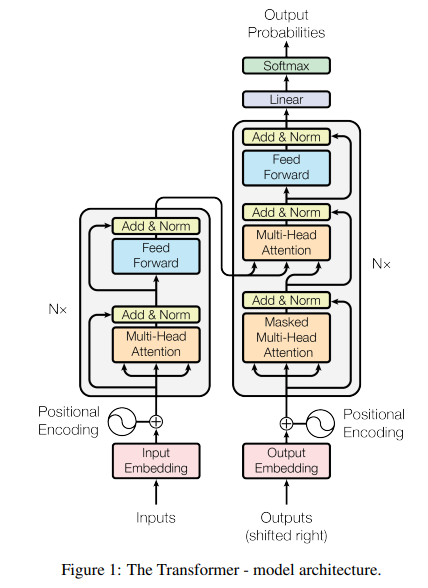

In [1]:
%matplotlib inline
from IPython.display import Image
Image('Images/Transformer Architecture.png')

##### 

##### Let's discuss how the input is processed in the sequential flow. 

## 1) Input Embedding
##### First, the input is embedded (Input Embedding block). This is required as most of the machine learning akgorithms needs vectors. So, the text input gets converted to vectors.
##### Eg: "Hello, How are you?" gets converted to [0.8, 0.6, 0.2, 0.1]
Note: The above vector is for example purpose, the real values are different but the process on how it is encoded remains the same, that is, input gets embedded into a vector

## 2) Positional Encoding
##### Next, we can see that Positional Encoding is added with the Input Embedding. As the name suggests, it is used to encode or give positional information to the Input Embedding. This is required because Transformers uses Attention to get the meaning for sequencing the next word. Let's take a small example: "Transformers are cool". Input embedding looks like [0.1, 0.8, 0.2, 0.5], positional encoding looks like [0.1, 0, 0.1, 0] and the added version for this particular example is [0.2, 0.8, 0.3, 0.5]. 
##### In the above example, the final vector will now remember the order of the tokens. In simpler words, positional encoding adds the position of the particular token. Why this is useful is discussed in the upcoming sessions.

##### The alternating use of sine and cosine in positional encoding allows the model to capture relative positions through unique, smooth, and continuous patterns that generalize across sequence lengths. This enables the Transformer to infer the order and distance between tokens without relying on recurrence or convolution.

## 3) Scaled Dot Product Attention
##### This is the fun part. This is one of the most important component in a Transformer. Attention mechanism learns the relationship between the current word with every other word. Eg: If the sentence is as before "Transformers are cool", then Attention for the word "are" is the relationship between "are" with the other words, in this case "Transformers" and "cool".
##### But what does relationships between words mean? Simply put, relationships tells us how similar the words are. This is achieved using Dot Product (hence the name Scaled Dot Product Attention). The higher the Dot Product, the similar are the words.

##### To understand this, we only need to know one formula.

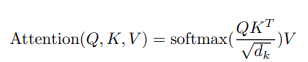

In [ ]:
%matplotlib inline
from IPython.display import Image
Image('Images\Attention_formula.png')

##### Let's understand this formula. There are a few variables we need to know: Q, K, V, d_model, d_k, d_v, n.

##### d_model is the dimension of the model. It is the size of each token's embedding. Here, d_model = 512.
##### d_v is the dimension of Value and d_k is the dimension of Key. d_v = d_k = 64
##### n is the size of the input or the number of tokens (can be thought of like words) in the input.

##### Q is the Query. It is a matrix of size (n, d_k). It is like the question the model is asking about a word. For intuition purpose, think the model is asking "What do I need to learn about this word?". 

##### K is the Keys. It is a matrix of size (n, d_k). It is like the summary of the word. Again, for intuition purpose, think the Keys replying to the Model's Queries: "Here is a summary of different words."

#### We transpose the K matrix so the size becomes (d_k, n). Then we perform a scaled dot product.The result would be a (n, n) matrix. What does it signify? Each word tells how similar it is to every other word. The higher the dot product of the two words, the higher the similarity and vice versa. This similarity is called Scores. So, the closer the meaning of the words, the higher the score and vice versa.

##### Softmax function is applied to this product. Softmax reduces to the values such that they sum to 1. In other words, softmax ensures that there is probability distribution. One observation we can make is that when the input is too large, the square matrix would be too big. Hence, the softmax will be closer to 0 or 1. This means that, there would be bias in the model. To solve this, we divide the dot product by a scalar, in this case, sqrt(d_k). We will explore why sqrt(d_k) is used and other interesting observations in the next section. The final result would be of size (n, n)

##### V is the Values. It is a matrix of size (n, d_v).  it represents what each word contributes to the final output after attention is applied. 

##### Attention is multiplying the softmax weighted scores we obtained above with the Values Matrix. The result would be of size (n, d_v) which is the size of Q, K, V.

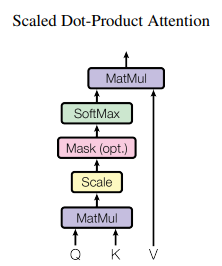

In [1]:
%matplotlib inline
from IPython.display import Image
Image('Images\Scaled Dot Product Attention.png')

##### This is the Scaled Dot Product Attention. All the steps are discussed above except the mask. Mask is mostly used in decoders and is discussed after this section. To recap, Q and K are multiplied to get Scores, the scores are scaled (sqrt(d_k)), then softmax is applied, then this result is multiplied with V to get the final result (Attention).

## Multi-Head Attention
##### To understand this, we need to use some of the variables which we already learnt: d_model, d_k, d_v, n. A new variable, N, is introduced.

##### N is the number of heads. Here, N=8. Think of it as the Single Dot product attention is used but for N times. This is useful because for the same word, we can capture or understand multiple possible contexts. For example: "Transformers are cool" is the input and for understanding purpose, we can assume that N=2. Then there would 2 Single Attentions. Attention 1 can be for checking if the word is related to verb, the other attention (Attention 2) can be used to check if the verb is related to adjective. Since, N=8, there would be 8 single Attentions calculated in parallel and each output is stacked. The final output or context for the word is the final attention layer's last column. 


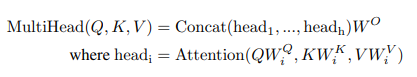

In [2]:
%matplotlib inline
from IPython.display import Image
Image('Images/Multi-Head Attention.png')

##### One thing we haven’t looked at closely yet is the weight matrices used in attention. These are trainable parameters that get updated during training. For example, when we create the query (Q), it’s actually computed by multiplying the input (of size n × d_model) with a weight matrix W_Q (of size d_model × d_k). These weights (W_Q) are what the model learns — they determine how the input should be transformed into a query that captures relevant features. Similarly, keys (K) and values (V) are also computed by multiplying the input with their own weight matrices: W_K and W_V. All of these weight matrices are trainable and adjusted throughout the learning process.

##### The outputs from each head is concatenated. This again is multiplied with Weight Matrix (W_O). Each head contains the information discussed above(Attention 1 checks for Verb, and so on).

##### Masked Multi-Head Attention are the same as discussed above but the only change is that we mask or ignore the words which comes after our current word. This is because to predict the next word, we should not have access to the next word while training the model. If the model can access the next words, it would simply copy them rather than learn them.

## 4) Add and Normalize step

##### We can see Add & Norm after Multi-Head Attention and then Feed Forward Layer. The Add is called the residual connection. The function of Add is to add the input with the result obtained from Attention or from Feed Forward. This is because having only the context is not useful, and it helps keep the original information. Normalize is done because we need to control the gradient (slope) during the training process for optimized results.

## 5) Feed Forward Network

##### Now we have the output of the Attention. This contains the information of the word as well as the context. But the model needs to learn how to use these contexts to make the connections. 

##### The Feed Forward Network expands the dimensionality to a higher space and then learns complex patterns about the word and it's context, then it reduces the size as before. In other words, it injects meaning to the context obtained from the Attention.

In [4]:
%matplotlib inline
from IPython.display import Image
Image('Images/Feed Forward Network.png')

##### ReLU stands for Rectified Linear Unit. When the input is more than 0, the output is the value itself. Otherwise, it becomes 0. In simple words, ReLU allows only the positive values to pass through and sets all negative values to zero. This is useful because it adds non-linearity to the model while keeping the computation simple.

## Building the Transformer


##### Now we have all the concepts we require to build our transformer. If we see the architecture, we can see two blocks, the left block is the Encoder while the right block is the Decoder. 

##### Encoders consists of [(Multi-Head Attention -> Add & Norm) -> (Feed Forward Network -> Add & Norm)]
##### Decoders consists of [(Masked Multi-head Attention -> Add & Norm) -> (Multi-Head Attention -> Add & Norm) -> (Feed Forward Network -> Add & Norm)]
##### Transformer Architecture goes like Input -> Encoder -> Decoder -> Softmax -> Output

##### Encoders can be thought of encoding the input into meaning context vectors. Decoders can be thought of taking this context vectors and the input and give the desired output.

##### Example, if the task is to translate from English to any other language (let's say French for example), then encoders take the input sentence then encodes each word by giving a context vector as output. The, Decoder takes this vector to generate the required French words one word at a time.

##### Sofmax turns the output into probabilities, the word with the highest probability is chosen as the next word.

##### There are Training and Testing phase after this. But it is like any other model, we train, optimize the weights, then test the model.

##### And that’s the magic behind Transformers — turning raw input into meaningful output by learning context, attention, and patterns, step by step.
